### Generative Adversial Networks 

    ###Code along practice/Implementation from Udemy Tensor-Flow Course - 

In [1]:
#import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#grab data
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
##extract data
mnist = input_data.read_data_sets("C:\\Users\\rhasan\\Downloads\\Tensorflow-Bootcamp\\Scikit IBM\\MNIST_data\\",one_hot=True)

Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\Scikit IBM\MNIST_data\train-images-idx3-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\Scikit IBM\MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\Scikit IBM\MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:\Users\rhasan\Downloads\Tensorflow-Bootcamp\Scikit IBM\MNIST_data\t10k-labels-idx1-ubyte.gz


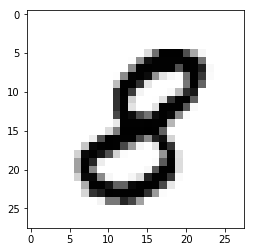

In [4]:
#plot a sample to view the data
plt.imshow(mnist.train.images[5].reshape(28,28),cmap='Greys')

In [5]:
# The Generator

def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z,units=128)
        
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        return output

In [6]:
# The Discriminator

def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X,units=128)
        
        alpha=0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        logits = tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits)
        
        return output, logits
        

In [7]:
# Placeholder

real_images = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape=[None,100])

In [8]:
# Generator
G = generator(z)

In [9]:
# Discriminator
D_output_real, D_logits_real = discriminator(real_images)

In [10]:
# Discriminator
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

### Losses

In [11]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [12]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)*(0.9))

In [13]:
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_real))

In [14]:
D_loss = D_real_loss + D_fake_loss

In [15]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

### Optimizers

In [16]:
learning_rate = 0.001

In [17]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

print([v.name for v in d_vars])
print([v.name for v in g_vars])

['dis/dense/kernel:0', 'dis/dense/bias:0', 'dis/dense_1/kernel:0', 'dis/dense_1/bias:0', 'dis/dense_2/kernel:0', 'dis/dense_2/bias:0']
['gen/dense/kernel:0', 'gen/dense/bias:0', 'gen/dense_1/kernel:0', 'gen/dense_1/bias:0', 'gen/dense_2/kernel:0', 'gen/dense_2/bias:0']


In [18]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

### Training Session

In [19]:
#Adjusted to my computer 
batch_size = 1 # try 100
epochs = 5 # try 500
init = tf.global_variables_initializer()
saver = tf.train.Saver(var_list=g_vars)

In [22]:
# Save a sample per epoch
samples = []

In [23]:
# Run Session
with tf.Session() as sess:
    
    sess.run(init)
    
    # Recall an epoch is an entire run through the training data
    for e in range(epochs):
        # // indicates classic division
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            
            # Grab batch of images
            batch = mnist.train.next_batch(batch_size)
            
            # Get images, reshape and rescale to pass to D
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            # Z (random latent noise data for Generator)
            # -1 to 1 because of tanh activation
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            # Run optimizers, no need to save outputs, we won't use them
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
        
            
        print("Currently on Epoch {} of {} total...".format(e+1, epochs))
        
        # Sample from generator as we're training for viewing afterwards
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z ,reuse=True),feed_dict={z: sample_z})
        
        samples.append(gen_sample)
        
        saver.save(sess, './models/500_epoch_model.ckpt.RH')

Currently on Epoch 1 of 5 total...
Currently on Epoch 2 of 5 total...
Currently on Epoch 3 of 5 total...
Currently on Epoch 4 of 5 total...
Currently on Epoch 5 of 5 total...


In [24]:
saver = tf.train.Saver(var_list=g_vars)

new_samples = []
with tf.Session() as sess:
    
    saver.restore(sess,'./models/500_epoch_model.ckpt.RH')
    
    for x in range(5):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
        new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from ./models/500_epoch_model.ckpt.RH


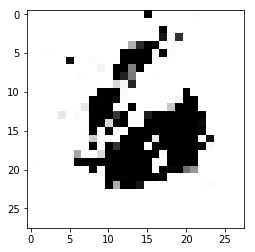

In [25]:
plt.imshow(samples[0].reshape(28,28),cmap='Greys')

In [26]:
#Looks like a 6!!